# Importing Tensorflow and checking it's version

In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0-rc0


# Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

# Importing the dataset

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Split them into train & test
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

170500096/170498071 [==============================] - 2s 0us/step


# Shape

In [4]:
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


# Number of classes in dataset

In [5]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


# Model using CNN

In [6]:
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training

In [8]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 17s 336us/sample - loss: 1.3119 - accuracy: 0.5477 - val_loss: 0.9667 - val_accuracy: 0.6541
Epoch 2/50
50000/50000 [==============================] - 11s 222us/sample - loss: 0.8496 - accuracy: 0.7042 - val_loss: 0.8678 - val_accuracy: 0.7089
Epoch 3/50
50000/50000 [==============================] - 11s 218us/sample - loss: 0.6944 - accuracy: 0.7635 - val_loss: 0.6652 - val_accuracy: 0.7731
Epoch 4/50
50000/50000 [==============================] - 11s 222us/sample - loss: 0.5842 - accuracy: 0.7986 - val_loss: 0.6639 - val_accuracy: 0.7789
Epoch 5/50
50000/50000 [==============================] - 11s 224us/sample - loss: 0.4916 - accuracy: 0.8313 - val_loss: 0.6825 - val_accuracy: 0.7815
Epoch 6/50
50000/50000 [==============================] - 12s 235us/sample - loss: 0.4209 - accuracy: 0.8548 - val_loss: 0.6021 - val_accuracy: 0.8052
Epoch 7/50
50000/50000 [====================

# Retrain data with augmentation

In [9]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Train for 1562 steps, validate on 10000 samples
Epoch 1/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.5511 - accuracy: 0.8260 - val_loss: 0.5054 - val_accuracy: 0.8362
Epoch 2/50
1562/1562 [==============================] - 29s 19ms/step - loss: 0.4376 - accuracy: 0.8572 - val_loss: 0.4888 - val_accuracy: 0.8414
Epoch 3/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.4016 - accuracy: 0.8678 - val_loss: 0.4446 - val_accuracy: 0.8543
Epoch 4/50
1562/1562 [==============================] - 29s 19ms/step - loss: 0.3822 - accuracy: 0.8723 - val_loss: 0.4506 - val_accuracy: 0.8511
Epoch 5/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.3593 - accuracy: 0.8798 - val_loss: 0.4462 - val_accuracy: 0.8605
Epoch 6/50
1562/1562 [==============================] - 29s 19ms/step - loss: 0.3457 - accuracy: 0.8842 - val_loss: 0.4558 - val_accuracy: 0.8515
Epoch 7/50
1562/1562 [==============================] - 29s 18ms/step - loss

# Loss Plot

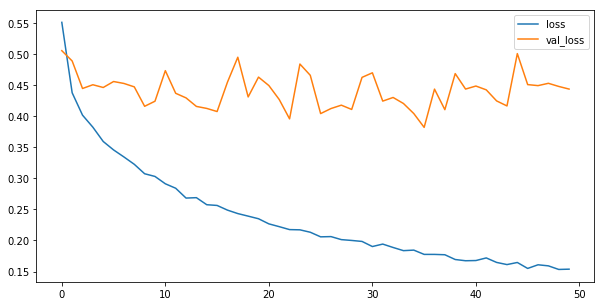

In [10]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,5]
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

# Accuracy Plot

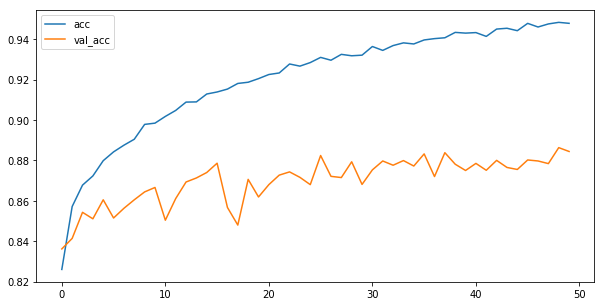

In [11]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# Confusion Matrix

Confusion matrix, without normalization
[[899   4  25   6   6   4   5   7  28  16]
 [  6 966   1   0   0   0   1   0   6  20]
 [ 26   0 851  23  28  16  39  13   4   0]
 [ 10   3  38 742  32  95  49  22   4   5]
 [  4   0  29  22 868   8  38  28   3   0]
 [  7   0  31 101  22 784  26  25   2   2]
 [  3   1  20  17   6   4 944   3   1   1]
 [  5   0   7   9  27  13   7 929   0   3]
 [ 29   6   5   3   2   0   3   2 937  13]
 [ 13  39   2   4   2   1   5   3   7 924]]


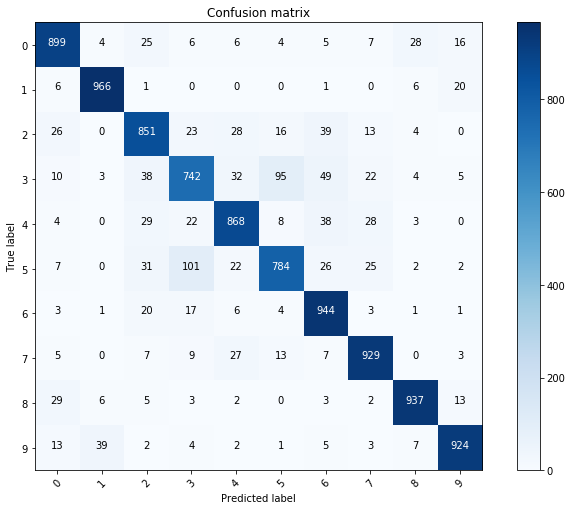

In [12]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
plt.rcParams['figure.figsize'] = [10,7]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Labels

In [13]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

# Right predictions

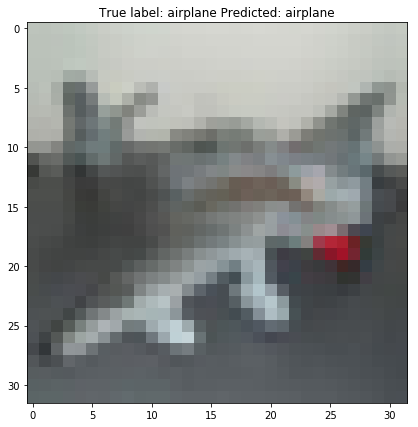

In [14]:
misclassified_idx = np.where(p_test == y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

# Wrong predictions

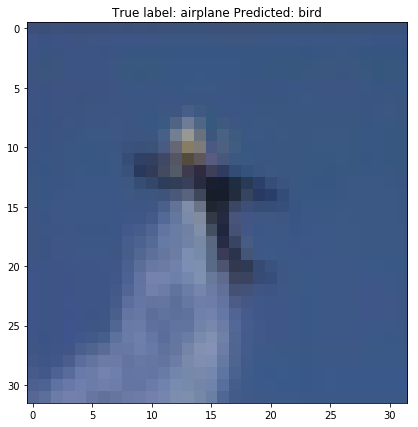

In [15]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

# Model summary

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 